In [1]:
import matplotlib.pyplot as plt
from torchvision.io import read_image
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.transforms import v2 as T
import utils
from engine import train_one_epoch, evaluate
import matplotlib.pyplot as plt

from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import matplotlib.pyplot as plt
import cv2
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

/home/djoser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

/tmp/ipykernel_6875/1255899706.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load("save_models/player_detector.pt")


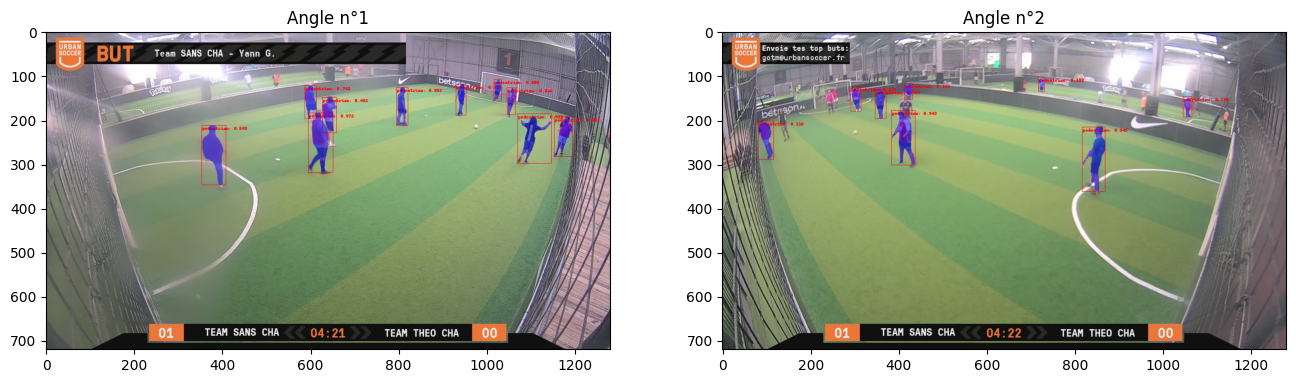

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

n=7810##7445#19370

image1 = read_image(f"data/match1/angle1/frame_{n:08d}.png")
image2 = read_image(f"data/match1/angle2/frame_{n+55:08d}.png")
eval_transform = get_transform(train=False)
model=torch.load("save_models/player_detector.pt")
model.eval()
with torch.no_grad():
    x1 = eval_transform(image1)
    # convert RGBA -> RGB and move to device
    x1 = x1[:3, ...].to(device)
    predictions1 = model([x1, ])
    pred1 = predictions1[0]


    x2 = eval_transform(image2)
    # convert RGBA -> RGB and move to device
    x2 = x2[:3, ...].to(device)
    predictions2 = model([x2, ])
    pred2 = predictions2[0]


image1 = (255.0 * (image1 - image1.min()) / (image1.max() - image1.min())).to(torch.uint8)
image2 = (255.0 * (image2 - image2.min()) / (image2.max() - image2.min())).to(torch.uint8)
image1 = image1[:3, ...]
image2 = image2[:3, ...]
pred_labels1 = [f"pedestrian: {score:.3f}" for label, score in zip(pred1["labels"], pred1["scores"])]
pred_labels2 = [f"pedestrian: {score:.3f}" for label, score in zip(pred2["labels"], pred2["scores"])]
pred_boxes_persons1 = pred1["boxes"].long()
pred_boxes_persons2 = pred2["boxes"].long()
output_image1 = draw_bounding_boxes(image1, pred_boxes_persons1, pred_labels1, colors="red")
output_image2 = draw_bounding_boxes(image2, pred_boxes_persons2, pred_labels2, colors="red")

masks1 = (pred1["masks"] > 0.7).squeeze(1)
masks2 = (pred2["masks"] > 0.7).squeeze(1)
output_image1 = draw_segmentation_masks(output_image1, masks1, alpha=0.5, colors="blue")
output_image2 = draw_segmentation_masks(output_image2, masks2, alpha=0.5, colors="blue")



plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Angle n°1")
plt.imshow(output_image1.permute(1, 2, 0))
plt.subplot(122)
plt.title("Angle n°2")
plt.imshow(output_image2.permute(1, 2, 0))

/tmp/ipykernel_6875/2868176101.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1=torch.load("save_models/ball_detector_1.pt")
/tmp/ipykernel_6875/2868176101.py:4: 

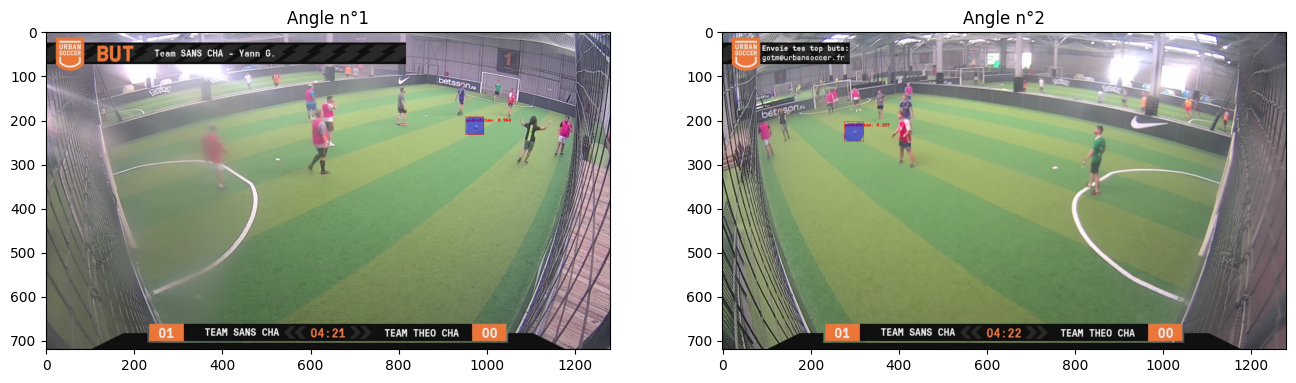

In [4]:
#n=7810

model_1=torch.load("save_models/ball_detector_1.pt")
model_2=torch.load("save_models/ball_detector_2.pt")
image1 = read_image(f"data/match1/angle1/frame_{n:08d}.png")
image2 = read_image(f"data/match1/angle2/frame_{n+55:08d}.png")
eval_transform = get_transform(train=False)

#model.eval()
model_1.eval()
model_2.eval()
with torch.no_grad():
    x1 = eval_transform(image1)
    # convert RGBA -> RGB and move to device
    x1 = x1[:3, ...].to(device)
    predictions1 = model_1([x1, ])
    pred1 = predictions1[0]


    x2 = eval_transform(image2)
    # convert RGBA -> RGB and move to device
    x2 = x2[:3, ...].to(device)
    predictions2 = model_2([x2, ])
    pred2 = predictions2[0]


image1 = (255.0 * (image1 - image1.min()) / (image1.max() - image1.min())).to(torch.uint8)
image2 = (255.0 * (image2 - image2.min()) / (image2.max() - image2.min())).to(torch.uint8)
image1 = image1[:3, ...]
image2 = image2[:3, ...]
pred_labels1 = [f"pedestrian: {score:.3f}" for label, score in zip(pred1["labels"], pred1["scores"])]
pred_labels2 = [f"pedestrian: {score:.3f}" for label, score in zip(pred2["labels"], pred2["scores"])]
pred_boxes_ball1 = pred1["boxes"].long()
pred_boxes_ball2 = pred2["boxes"].long()
output_image1 = draw_bounding_boxes(image1, pred_boxes_ball1, pred_labels1, colors="red")
output_image2 = draw_bounding_boxes(image2, pred_boxes_ball2, pred_labels2, colors="red")

masks1 = (pred1["masks"] > 0.7).squeeze(1)
masks2 = (pred2["masks"] > 0.7).squeeze(1)
output_image1 = draw_segmentation_masks(output_image1, masks1, alpha=0.5, colors="blue")
output_image2 = draw_segmentation_masks(output_image2, masks2, alpha=0.5, colors="blue")



plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Angle n°1")
plt.imshow(output_image1.permute(1, 2, 0))
plt.subplot(122)
plt.title("Angle n°2")
plt.imshow(output_image2.permute(1, 2, 0))

In [5]:
np_ball1=pred_boxes_ball1[0].cpu().numpy()
np_ball2=pred_boxes_ball2[0].cpu().numpy()
x_mean_1 = (np_ball1[0]+np_ball1[2])/2
y_mean_1 = (np_ball1[1]+np_ball1[3])/2
x_mean_2 = (np_ball2[0]+np_ball2[2])/2
y_mean_2 = (np_ball2[1]+np_ball2[3])/2
print(f"p1 : x={x_mean_1} , y={y_mean_1}" )
print(f"p2 : x={x_mean_2} , y={y_mean_2}" )

p1 : x=972.5 , y=214.0
p2 : x=299.0 , y=227.0


In [6]:
import numpy as np

# Matrice de calibration intrinsèque K (supposons que les deux caméras ont les mêmes paramètres intrinsèques)
fx = 1000  # Longueur focale en pixels (à ajuster selon les spécifications de la caméra)
fy = 1000  # Longueur focale en pixels (à ajuster selon les spécifications de la caméra)
cx = 360  # Centre optique en pixels (à ajuster selon les spécifications de la caméra)
cy = 640  # Centre optique en pixels (à ajuster selon les spécifications de la caméra)

K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0, 0, 1]])

# Matrice de rotation R et vecteur de translation t pour la caméra 1 (coin nord-est du terrain)
R1 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])
t1 = np.array([[17.5],  # 10 mètres à partir du centre du terrain en x
               [-10],  # 17.5 mètres à partir du centre du terrain en y
               [2.5]])  # 2.5 mètres au-dessus du sol

# Matrice de rotation R et vecteur de translation t pour la caméra 2 (coin nord-ouest du terrain)
R2 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])
t2 = np.array([[-17.5],  # -10 mètres à partir du centre du terrain en x
               [-10],  # 17.5 mètres à partir du centre du terrain en y
               [2.5]])  # 2.5 mètres au-dessus du sol

# Matrices de projection P1 et P2
P1 = np.dot(K, np.hstack((R1, t1)))
P2 = np.dot(K, np.hstack((R2, t2)))

# Afficher les matrices de projection
print("Matrice de projection P1 pour la caméra 1:")
print(P1)
print("Matrice de projection P2 pour la caméra 2:")
print(P2)

Matrice de projection P1 pour la caméra 1:
[[ 1.00e+03  0.00e+00  3.60e+02  1.84e+04]
 [ 0.00e+00  1.00e+03  6.40e+02 -8.40e+03]
 [ 0.00e+00  0.00e+00  1.00e+00  2.50e+00]]
Matrice de projection P2 pour la caméra 2:
[[ 1.00e+03  0.00e+00  3.60e+02 -1.66e+04]
 [ 0.00e+00  1.00e+03  6.40e+02 -8.40e+03]
 [ 0.00e+00  0.00e+00  1.00e+00  2.50e+00]]


In [7]:
import cv2
import numpy as np

# Fonction pour trianguler les positions 3D
def triangulate_points(P1, P2, points1, points2):
    points4D = cv2.triangulatePoints(P1, P2, points1, points2)
    points3D = points4D[:3] / points4D[3]
    return points3D.T

# Fonction pour projeter les positions 3D sur le terrain
def project_to_ground(points3D, ground_plane):
    # ground_plane est une matrice 4x4 représentant le plan du terrain
    points2D = np.dot(ground_plane[:3, :3], points3D.T) + ground_plane[:3, 3:]
    return points2D.T

# Exemple de matrices de projection P1 et P2
# Supposons que vous avez les matrices de projection pour les deux caméras
#P1 = np.array([[1.00e+03, 0.00e+00, 3.20e+02, 8.00e+02],
             # [0.00e+00, 1.00e+03, 2.40e+02, 1.81e+04],
             #  [0.00e+00, 0.00e+00, 1.00e+00, 2.50e+00]])

#P2 = np.array([[1.00e+03, 0.00e+00, 3.20e+02, 2.08e+04],
              # [0.00e+00, 1.00e+03, 2.40e+02, 1.81e+04],
              # [0.00e+00, 0.00e+00, 1.00e+00, 2.50e+00]])

# Points 2D correspondants dans les deux vues
# Supposons que vous avez les points 2D des objets détectés dans les deux vues


points1 = np.array([[x_mean_1, y_mean_1]])  # Points 2D dans la vue 1
points2 = np.array([[x_mean_2, y_mean_2]])  # Points 2D dans la vue 2

# Trianguler les positions 3D
points3D = triangulate_points(P1, P2, points1.T, points2.T)

# Projeter les positions 3D sur le terrain
ground_plane = np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])  # Exemple de plan du terrain
points2D = project_to_ground(points3D, ground_plane)

# Afficher les positions des joueurs sur le terrain
print("Position des joueurs sur le terrain:", points3D)


Position des joueurs sur le terrain: [[ 14.33103826 -11.80147916  49.46900353]]


In [8]:
def normalize_data (data,min_data, max_data):
    return (data-min_data)/(max_data-min_data)

In [9]:
X_data=[[861,191,420,208],#x1,y1,x2,y2
        [525,290,292,176],
        [989,159,757,309],
        [199,484,209,179], #cages 3m largeur 2m hauteur
        [132,281,209,124],
        [161,358,294,158],
        [122,213,2902,111],
        [1068,158,1086,506],
        [1074,109,1156,287],
        [986,139,1122,381],
        [991,94,1162,231],
        [867,117,1144,288],
        [138,269,393,139],
        [1189,286,85,293],
        [632,150,637,166]]
y_data=[[0,0,0],#x,y,z
        [-13.5,0,0],
        [13.5,0,0],
        [-17.5,-1.5,0],
        [-17.5,-1.5,2],
        [-17.5,1.5,0],
        [-17.5,1.5,2],
        [17.5,-1.5,0],
        [17.5,-1.5,2],
        [17.5,1.5,0],
        [17.5,1.5,2],
        [17.5,12.5,0],
        [-17.5,12.5,0],
        [0,-12.5,0],
        [0,12.5,0]]
min_data=np.array([0,0,0,0])
max_data=np.array([1280,720,1280,720])

X_data=normalize_data(np.array(X_data),min_data,max_data)
print(X_data)

[[0.67265625 0.26527778 0.328125   0.28888889]
 [0.41015625 0.40277778 0.228125   0.24444444]
 [0.77265625 0.22083333 0.59140625 0.42916667]
 [0.15546875 0.67222222 0.16328125 0.24861111]
 [0.103125   0.39027778 0.16328125 0.17222222]
 [0.12578125 0.49722222 0.2296875  0.21944444]
 [0.0953125  0.29583333 2.2671875  0.15416667]
 [0.834375   0.21944444 0.8484375  0.70277778]
 [0.8390625  0.15138889 0.903125   0.39861111]
 [0.7703125  0.19305556 0.8765625  0.52916667]
 [0.77421875 0.13055556 0.9078125  0.32083333]
 [0.67734375 0.1625     0.89375    0.4       ]
 [0.1078125  0.37361111 0.30703125 0.19305556]
 [0.92890625 0.39722222 0.06640625 0.40694444]
 [0.49375    0.20833333 0.49765625 0.23055556]]


In [10]:
print(len(X_data))
print(len(y_data))

15
15


In [11]:
import torch.nn as nn
 
# Define the model
model = nn.Sequential(
    nn.Linear(4, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
     nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 3)
)

In [12]:

import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [13]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
 
# train-test split of the dataset

X_train = torch.tensor(X_data, dtype=torch.float32)
y_train = torch.tensor(y_data, dtype=torch.float32)
X_test = torch.tensor(X_data, dtype=torch.float32)
y_test = torch.tensor(y_data, dtype=torch.float32)

# training parameters
n_epochs = 10000 # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    
    mse = loss_fn(y_pred, y_test)
    print(f"Epoch:{epoch} ---- MSE={mse}")
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)


Epoch:0 ---- MSE=90.86972045898438
Epoch:1 ---- MSE=90.84605407714844
Epoch:2 ---- MSE=90.82267761230469
Epoch:3 ---- MSE=90.79966735839844
Epoch:4 ---- MSE=90.77686309814453
Epoch:5 ---- MSE=90.75443267822266
Epoch:6 ---- MSE=90.73184204101562
Epoch:7 ---- MSE=90.70923614501953
Epoch:8 ---- MSE=90.6866455078125
Epoch:9 ---- MSE=90.66397857666016
Epoch:10 ---- MSE=90.6407470703125
Epoch:11 ---- MSE=90.61674499511719
Epoch:12 ---- MSE=90.59199523925781
Epoch:13 ---- MSE=90.56636047363281
Epoch:14 ---- MSE=90.5395278930664
Epoch:15 ---- MSE=90.51182556152344
Epoch:16 ---- MSE=90.48296356201172
Epoch:17 ---- MSE=90.45219421386719
Epoch:18 ---- MSE=90.42021179199219
Epoch:19 ---- MSE=90.38723754882812
Epoch:20 ---- MSE=90.3529281616211
Epoch:21 ---- MSE=90.31735229492188
Epoch:22 ---- MSE=90.2801284790039
Epoch:23 ---- MSE=90.24186706542969
Epoch:24 ---- MSE=90.20211791992188
Epoch:25 ---- MSE=90.15995788574219
Epoch:26 ---- MSE=90.11543273925781
Epoch:27 ---- MSE=90.06919860839844
Epoch:2

<All keys matched successfully>

torch.save(model, "save_models/3D_constructor.pt")

MSE: 0.00
RMSE: 0.00


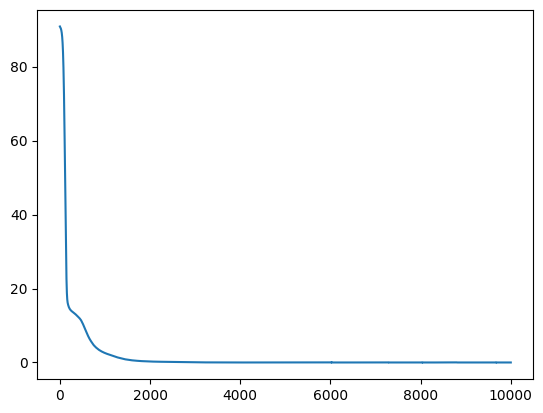

In [14]:

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [15]:
X_data=[[861,191,420,208],#x1,y1,x2,y2
        [861,191,512,197],
        [864,318,420,208],

        [525,290,292,176],
        [525,290,386,163],
        [737,334,292,176],

        [989,159,757,309],
        [989,159,493,321],
        [1016,197,757,309],

        [199,484,209,179],
        [199,484,192,196], #cages 3m largeur 2m hauteur
        [426,528,209,179],

        [132,281,209,124],
        [132,281,243,84],
        [264,236,209,124],

        [161,358,294,158],
        [161,358,352,165],
        [306,308,294,158],

        [122,213,290,111],
        [122,213,316,110],
        [248,202,290,111],

        [1068,158,1086,506],
        [1068,158,913,438],
        [1096,163,1086,506],

        [1074,109,1156,287],
        [1074,109,1063,151],
        [1142,191,1156,287],

        [986,139,1122,381],
        [986,139,1185,212],
        [951,161,1122,381],

        [991,94,1162,231],
        [991,94,1109,237],
        [1029,167,1162,231]]
y_data=[[1],#x,y,z
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0],

        [1],
        [0],
        [0]]
min_data=np.array([0,0,0,0])
max_data=np.array([1280,720,1280,720])

X_data=normalize_data(np.array(X_data),min_data,max_data)
print(X_data)


[[0.67265625 0.26527778 0.328125   0.28888889]
 [0.67265625 0.26527778 0.4        0.27361111]
 [0.675      0.44166667 0.328125   0.28888889]
 [0.41015625 0.40277778 0.228125   0.24444444]
 [0.41015625 0.40277778 0.3015625  0.22638889]
 [0.57578125 0.46388889 0.228125   0.24444444]
 [0.77265625 0.22083333 0.59140625 0.42916667]
 [0.77265625 0.22083333 0.38515625 0.44583333]
 [0.79375    0.27361111 0.59140625 0.42916667]
 [0.15546875 0.67222222 0.16328125 0.24861111]
 [0.15546875 0.67222222 0.15       0.27222222]
 [0.3328125  0.73333333 0.16328125 0.24861111]
 [0.103125   0.39027778 0.16328125 0.17222222]
 [0.103125   0.39027778 0.18984375 0.11666667]
 [0.20625    0.32777778 0.16328125 0.17222222]
 [0.12578125 0.49722222 0.2296875  0.21944444]
 [0.12578125 0.49722222 0.275      0.22916667]
 [0.2390625  0.42777778 0.2296875  0.21944444]
 [0.0953125  0.29583333 0.2265625  0.15416667]
 [0.0953125  0.29583333 0.246875   0.15277778]
 [0.19375    0.28055556 0.2265625  0.15416667]
 [0.834375   

In [16]:
X_train= [
    [861, 191, 420, 208],  # x1, y1, x2, y2
    [525, 290, 292, 176],
    [989, 159, 757, 309],
    [199, 484, 209, 179],  # cages 3m largeur 2m hauteur
    [132, 281, 209, 124],
    [161, 358, 294, 158],
    [122, 213, 290, 111],
    [1068, 158, 1086, 506],
    [1074, 109, 1156, 287],
    [986, 139, 1122, 381],
    [991, 94, 1162, 231],
    [867, 117, 1144, 288],
    [138, 269, 393, 139],
    [1189, 286, 85, 293],
    [632, 150, 637, 166]
]

# Fonction pour générer des variations des points connus
def generate_variations(point, variation_range=200):
    variations = []
    # x1+
    variation = point.copy()
    variation[0] += np.random.randint(1, variation_range)
    variations.append(variation)
    # x1-
    variation = point.copy()
    variation[0] -= np.random.randint(1, variation_range)
    variations.append(variation)
    # y1+
    variation = point.copy()
    variation[1] += np.random.randint(1, variation_range)
    variations.append(variation)
    # y1-
    variation = point.copy()
    variation[1] -= np.random.randint(1, variation_range)
    variations.append(variation)
    # x2+
    variation = point.copy()
    variation[2] += np.random.randint(1, variation_range)
    variations.append(variation)
    # x2-
    variation = point.copy()
    variation[2] -= np.random.randint(1, variation_range)
    variations.append(variation)
    # y2+
    variation = point.copy()
    variation[3] += np.random.randint(1, variation_range)
    variations.append(variation)
    # y2-
    variation = point.copy()
    variation[3] -= np.random.randint(1, variation_range)
    variations.append(variation)
    return variations

# Générer le dataset d'entraînement
X_data = []
y_data = []

for point in X_train:
    X_data.append(point)
    y_data.append([1])

    variations = generate_variations(point)
    for variation in variations:
        X_data.append(variation)
        y_data.append([0])

# Convertir les listes en tableaux NumPy
X_data = np.array(X_data)
y_data = np.array(y_data)

# Afficher les données générées
print("X_train:", X_data)
print("y_train:", y_data)
min_data=np.array([0,0,0,0])
max_data=np.array([1280,720,1280,720])

X_data=normalize_data(np.array(X_data),min_data,max_data)
print(X_data)


X_train: [[ 861  191  420  208]
 [ 888  191  420  208]
 [ 742  191  420  208]
 [ 861  363  420  208]
 [ 861  137  420  208]
 [ 861  191  532  208]
 [ 861  191  265  208]
 [ 861  191  420  277]
 [ 861  191  420  133]
 [ 525  290  292  176]
 [ 564  290  292  176]
 [ 435  290  292  176]
 [ 525  479  292  176]
 [ 525  128  292  176]
 [ 525  290  475  176]
 [ 525  290  230  176]
 [ 525  290  292  282]
 [ 525  290  292   -6]
 [ 989  159  757  309]
 [1032  159  757  309]
 [ 860  159  757  309]
 [ 989  342  757  309]
 [ 989   91  757  309]
 [ 989  159  857  309]
 [ 989  159  684  309]
 [ 989  159  757  467]
 [ 989  159  757  306]
 [ 199  484  209  179]
 [ 379  484  209  179]
 [ 157  484  209  179]
 [ 199  560  209  179]
 [ 199  321  209  179]
 [ 199  484  371  179]
 [ 199  484  158  179]
 [ 199  484  209  193]
 [ 199  484  209   77]
 [ 132  281  209  124]
 [ 234  281  209  124]
 [  81  281  209  124]
 [ 132  394  209  124]
 [ 132  144  209  124]
 [ 132  281  331  124]
 [ 132  281  155  124]
 [

In [17]:
import torch.nn as nn
 
# Define the model
model_class = nn.Sequential(
    nn.Linear(4, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

In [18]:
import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.BCELoss()  # mean square error
optimizer = optim.Adam(model_class.parameters(), lr=0.0001)

Epoch:0 ---- ACC=0.8888888955116272
Epoch:1 ---- ACC=0.8888888955116272
Epoch:2 ---- ACC=0.8888888955116272
Epoch:3 ---- ACC=0.8888888955116272
Epoch:4 ---- ACC=0.8888888955116272
Epoch:5 ---- ACC=0.8888888955116272
Epoch:6 ---- ACC=0.8888888955116272
Epoch:7 ---- ACC=0.8888888955116272
Epoch:8 ---- ACC=0.8888888955116272
Epoch:9 ---- ACC=0.8888888955116272
Epoch:10 ---- ACC=0.8888888955116272
Epoch:11 ---- ACC=0.8888888955116272
Epoch:12 ---- ACC=0.8888888955116272
Epoch:13 ---- ACC=0.8888888955116272
Epoch:14 ---- ACC=0.8888888955116272
Epoch:15 ---- ACC=0.8888888955116272
Epoch:16 ---- ACC=0.8888888955116272
Epoch:17 ---- ACC=0.8888888955116272
Epoch:18 ---- ACC=0.8888888955116272
Epoch:19 ---- ACC=0.8888888955116272
Epoch:20 ---- ACC=0.8888888955116272
Epoch:21 ---- ACC=0.8888888955116272
Epoch:22 ---- ACC=0.8888888955116272
Epoch:23 ---- ACC=0.8888888955116272
Epoch:24 ---- ACC=0.8888888955116272
Epoch:25 ---- ACC=0.8888888955116272
Epoch:26 ---- ACC=0.8888888955116272
Epoch:27 --

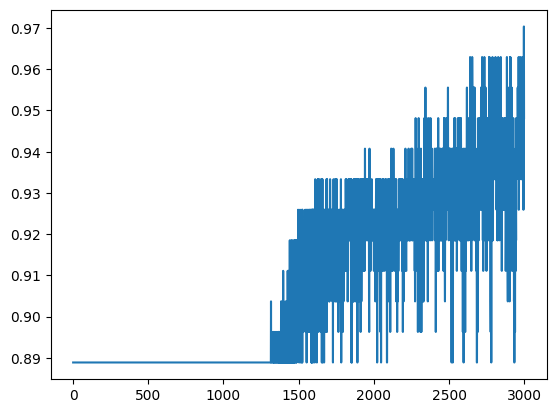

In [19]:
X_train = torch.tensor(X_data, dtype=torch.float32)
y_train = torch.tensor(y_data, dtype=torch.float32)
X_test = torch.tensor(X_data, dtype=torch.float32)
y_test = torch.tensor(y_data, dtype=torch.float32)

# training parameters
n_epochs = 3000  # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_acc = -np.inf   # init to negative infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model_class.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model_class(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            acc = (y_pred.round() == y_batch).float().mean()
            bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
            )
    # evaluate accuracy at end of each epoch
    model_class.eval()
    y_pred = model_class(X_test)
    acc = (y_pred.round() == y_test).float().mean()
    acc = float(acc)

    print(f"Epoch:{epoch} ---- ACC={acc}")

    history.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model_class.state_dict())

# restore model and return best accuracy
model_class.load_state_dict(best_weights)

print("ACC: %.2f" % best_acc)
plt.plot(history)
plt.show()

torch.save(model_class, "save_models/correspondances_detector.pt")

In [20]:
print(points1)

ball=np.concatenate((points1.flatten(),points2.flatten()))
ball_pos=model_class(torch.from_numpy(normalize_data(ball,min_data,max_data)).float())
print (ball_pos.detach().numpy())
points1_err=points1+1000
print(points1_err)
ball_err=np.concatenate((points1_err.flatten(),points2.flatten()))
ball_pos_err=model_class(torch.from_numpy(normalize_data(ball_err,min_data,max_data)).float())
print (ball_pos_err.detach().numpy())

[[972.5 214. ]]
[0.00303794]
[[1972.5 1214. ]]
[0.]


In [21]:
print(points1)
ball=normalize_data(np.concatenate((points1.flatten(),points2.flatten())),min_data,max_data)
ball_pos=model(torch.from_numpy(ball).float())
print (ball_pos)

[[972.5 214. ]]
tensor([-0.2694, -7.0809,  0.3698], grad_fn=<ViewBackward0>)


In [22]:
from scipy.optimize import linear_sum_assignment

# Supposons que pred_boxes_persons1 et pred_boxes_persons2 sont des tenseurs PyTorch
pred_boxes_persons1_np = pred_boxes_persons1.cpu().numpy()
pred_boxes_persons2_np = pred_boxes_persons2.cpu().numpy()

# Calculer les centres des bounding boxes
centers1 = [((box[0] + box[2]) / 2, (box[1] + box[3]) / 2) for box in pred_boxes_persons1_np]
centers2 = [((box[0] + box[2]) / 2, (box[1] + box[3]) / 2) for box in pred_boxes_persons2_np]

# Convertir les listes de centres en tableaux NumPy
centers1_np = np.array(centers1)
centers2_np = np.array(centers2)

# Initialiser le tableau des scores
score_matrix = np.zeros((len(centers1_np), len(centers2_np)))

# Calculer les scores de correspondance pour chaque paire de points
for i, center1 in enumerate(centers1_np):
    for j, center2 in enumerate(centers2_np):
        # Concaténer les centres des deux angles de vue
        concatenated_centers = np.concatenate((center1, center2))
        # Utiliser le modèle pour obtenir la position 3D des centres
        score = model_class(torch.from_numpy(concatenated_centers).float()).item()
        score_matrix[i, j] = score

# Utiliser l'algorithme de Kuhn-Munkres pour trouver la correspondance optimale
row_ind, col_ind = linear_sum_assignment(-score_matrix)

# Concaténer les centres des bounding boxes correspondants
centers_concat = np.concatenate((centers1_np[row_ind], centers2_np[col_ind]), axis=1)

# Afficher les centres
print("Centers1:", centers1)
print("Centers2:", centers2)
print("Concatenated Centers:\n", centers_concat)
centers_concat=normalize_data(centers_concat,min_data,max_data)
# Utiliser le modèle pour obtenir la position 3D des centres
centers_pos = model(torch.from_numpy(centers_concat).float()).detach().numpy()

print("Positions 3D des centres des bounding boxes :")
print(centers_pos)

Centers1: [(623.0, 252.5), (808.0, 170.0), (941.5, 155.0), (1108.5, 243.0), (1173.5, 239.0), (1055.5, 158.5), (1024.5, 133.5), (600.0, 160.5), (380.5, 280.5), (643.0, 190.0)]
Centers2: [(843.0, 290.0), (411.0, 241.0), (359.5, 165.0), (303.5, 153.0), (724.5, 120.0), (423.0, 136.0), (1056.0, 171.0), (99.5, 246.5)]
Concatenated Centers:
 [[ 623.   252.5  843.   290. ]
 [ 808.   170.   411.   241. ]
 [ 941.5  155.   359.5  165. ]
 [1108.5  243.   303.5  153. ]
 [1173.5  239.   724.5  120. ]
 [1055.5  158.5  423.   136. ]
 [1024.5  133.5 1056.   171. ]
 [ 600.   160.5   99.5  246.5]]
Positions 3D des centres des bounding boxes :
[[  4.209552    14.53377     -0.33986896]
 [ -1.3717512    1.5535898   -0.17805189]
 [  0.89467883  -3.3458807    0.41126972]
 [  1.9426396   -9.849755     0.34741598]
 [ 10.75288     -6.446028     1.2867732 ]
 [  5.22097     -6.3283825    0.54604036]
 [ 15.968726    -0.42711988   1.4116259 ]
 [-12.892022    -3.0733278    0.33902603]]


In [23]:


# Utiliser le modèle pour obtenir la position 3D des centres
centers_pos = model(torch.from_numpy(centers_concat).float())

print("Positions 3D des centres des bounding boxes :")
print(centers_pos)

Positions 3D des centres des bounding boxes :
tensor([[  4.2096,  14.5338,  -0.3399],
        [ -1.3718,   1.5536,  -0.1781],
        [  0.8947,  -3.3459,   0.4113],
        [  1.9426,  -9.8498,   0.3474],
        [ 10.7529,  -6.4460,   1.2868],
        [  5.2210,  -6.3284,   0.5460],
        [ 15.9687,  -0.4271,   1.4116],
        [-12.8920,  -3.0733,   0.3390]], grad_fn=<AddmmBackward0>)


-7.0808554


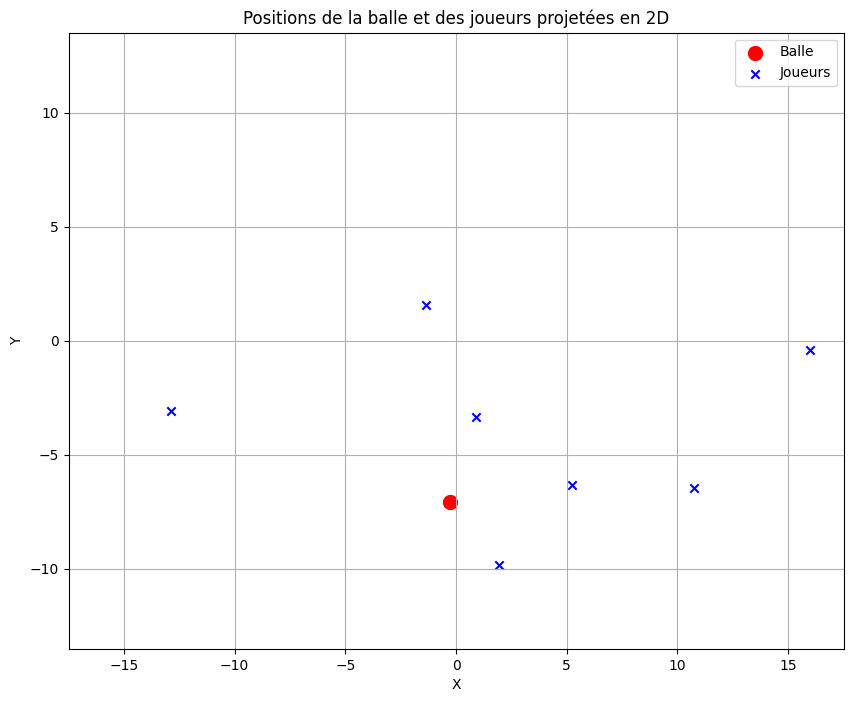

In [24]:
import matplotlib.pyplot as plt

# Convertir le tenseur en tableau NumPy
ball_pos_np = ball_pos.detach().cpu().numpy()

# Coordonnées du point 3D de la balle
x_ball, y_ball, z_ball = ball_pos_np
print(y_ball)

# Supposons que vous avez déjà les coordonnées 3D des joueurs
# Convertir le tenseur des joueurs en tableau NumPy
centers_pos_np = centers_pos.detach().cpu().numpy()

# Coordonnées des points 3D des joueurs
x_players = centers_pos_np[:, 0]
y_players = centers_pos_np[:, 1]
z_players = centers_pos_np[:, 2]

# Création du graphique
plt.figure(figsize=(10, 8))

# Afficher la position de la balle
plt.scatter(x_ball, y_ball, color='red', label='Balle', marker='o', s=100)

# Afficher les positions des joueurs
plt.scatter(x_players, y_players, color='blue', label='Joueurs', marker='x')

# Définir les limites du plan
plt.xlim(-17.5, 17.5)
plt.ylim(-13.5, 13.5)

# Ajouter des étiquettes et une légende
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Positions de la balle et des joueurs projetées en 2D')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()

In [25]:
print(device)

cuda
